In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import csv
import shutil
import re 
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import tensorflow_addons as tfa
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
#hide all warnings of tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2023-10-23 11:09:46.271419: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-23 11:09:46.276124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 11:09:46.329788: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 11:09:46.329824: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 11:09:46.329853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [10]:
#cargar modelo para evaluar
modelo_simple =  tf.keras.models.load_model('mejor_modelo_simple.h5')
historia_simple = pd.read_csv('historia_simple.csv')

In [11]:
#REINDEXAR DESDE 1
historia_simple.index = historia_simple.index + 1

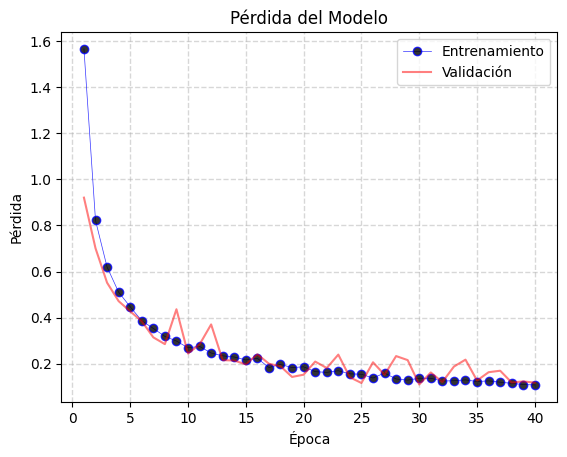

In [12]:
#Gráfico de la Pérdida (Loss) durante el Entrenamiento y Validación:
plt.plot(historia_simple['loss'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_simple['val_loss'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
#set xlim para coincidir con el mejor modelo el 0 con el 1 en epocas

#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
#save plot tight layout
plt.savefig('loss_simple.png', bbox_inches='tight')
plt.show()

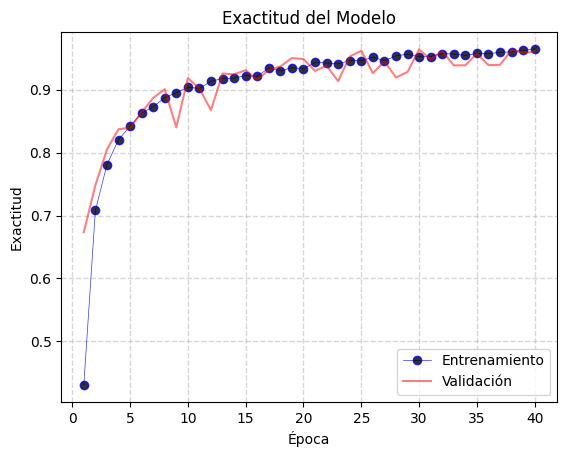

In [13]:
#Gráfico de la Exactitud (Accuracy) durante el Entrenamiento y Validación:
plt.plot(historia_simple['accuracy'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_simple['val_accuracy'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Exactitud del Modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
#save plot tight layout
plt.savefig('accuracy_simple.png', bbox_inches='tight')
plt.show()


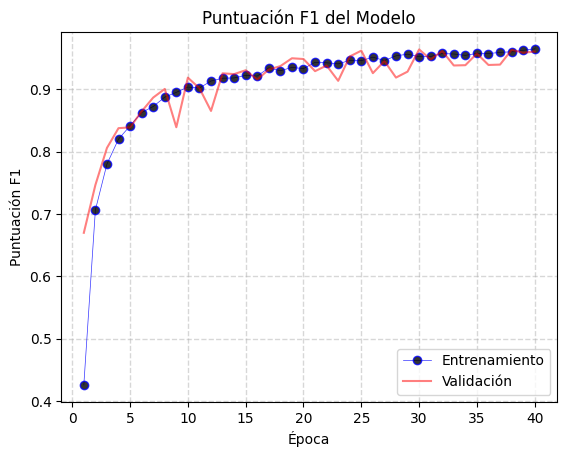

In [14]:
#Gráfico de la Puntuación F1 (F1 Score) durante el Entrenamiento y Validación
plt.plot(historia_simple['f1_score'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_simple['val_f1_score'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Puntuación F1 del Modelo')
plt.ylabel('Puntuación F1')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)
#save plot tight layout
plt.savefig('f1_score_simple.png', bbox_inches='tight')
plt.show()

In [15]:
df_val = pd.read_csv('valid/valid.csv')
#procesar las imagenes de validacion para usar el modelo
datagen_valid = ImageDataGenerator(rescale=1./255)

#creamos un generador de datos para el conjunto de validacion
valid_generator = datagen_valid.flow_from_dataframe(
    dataframe=df_val,
    directory=None,
    x_col='path',
    y_col='label',
    target_size=(256, 256),
    batch_size=32,
    class_mod='categorical',
    shuffle=False
)


Found 4585 validated image filenames belonging to 10 classes.


144/144 [==============================] - 10s 69ms/step


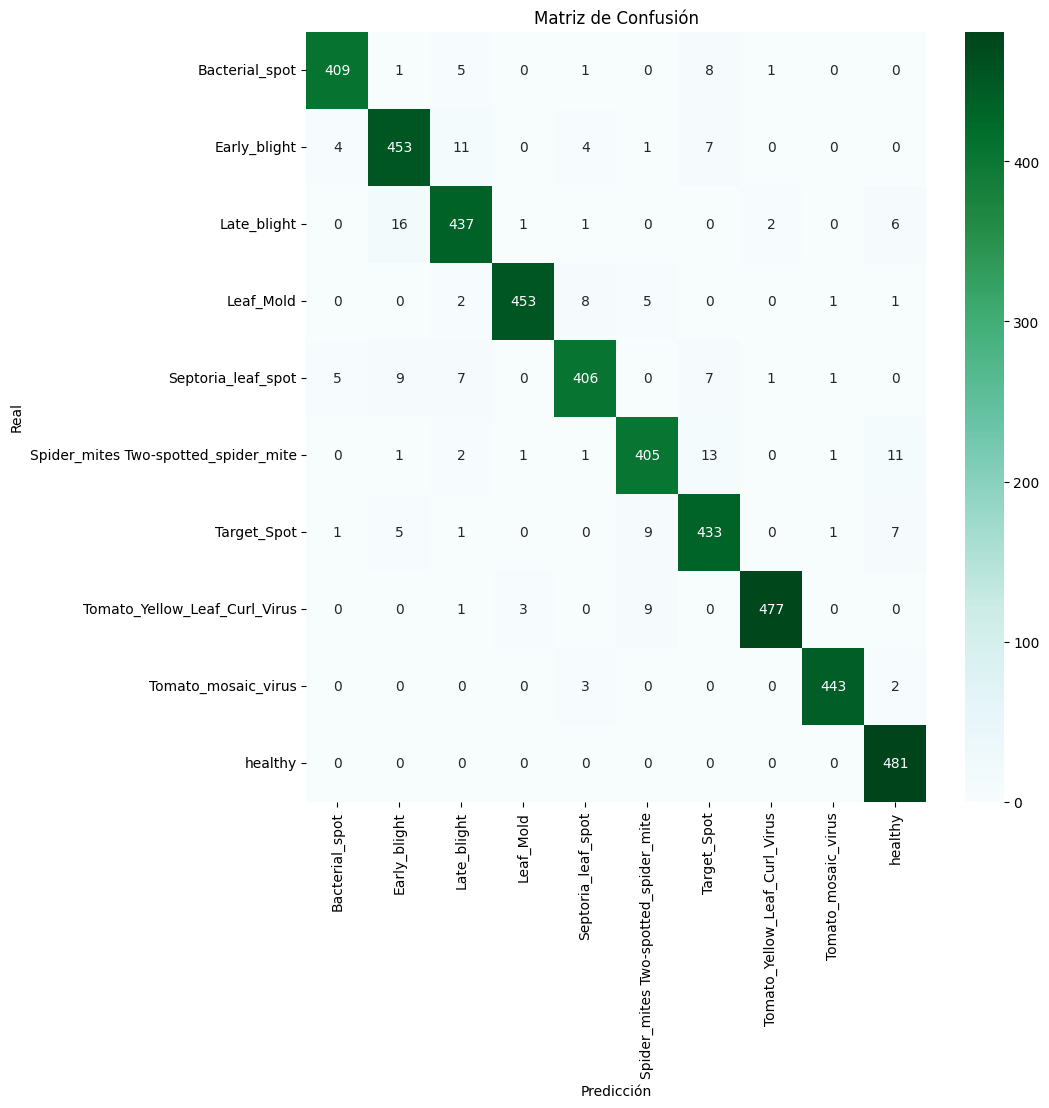

In [16]:
#obtener la matriz de confusión y el accuracy del modelo
Y_pred = modelo_simple.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
#plot confusion matrix
cm = confusion_matrix(valid_generator.classes, y_pred)
#plot la matriz de confusion
plt.figure(figsize=(10,10))
#colorear con gist_ncar

sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())

plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
#save plot tight layout
plt.savefig('confusion_matrix_simple.png', bbox_inches='tight')
plt.show()

In [8]:
results = modelo_simple.evaluate(valid_generator)
print(f'Loss: {results[0]}, Accuracy: {results[1]}, F1-Score: {results[2]}, Recall: {results[3]}')

144/144 [==============================] - 9s 59ms/step - loss: 0.1266 - accuracy: 0.9590 - f1_score: 0.9590 - recall: 0.9570
Loss: 0.12658682465553284, Accuracy: 0.9589967131614685, F1-Score: 0.9590228796005249, Recall: 0.9570338129997253


In [19]:
#Evaluamos el modelo descongelado
modelo_descongelado =  tf.keras.models.load_model('mejor_modelo_resnet.h5')
historia_descongelado = pd.read_csv('historia_descongelado.csv')

In [36]:
#REINDEXAR DESDE 1
historia_descongelado.index = historia_descongelado.index + 1

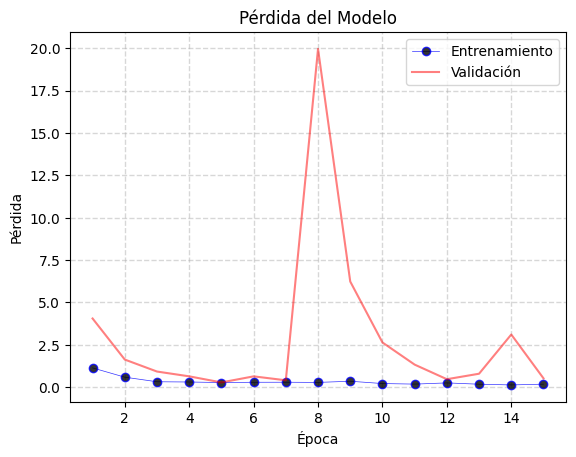

In [38]:
#Gráfico de la Pérdida (Loss) durante el Entrenamiento y Validación:
plt.plot(historia_descongelado['loss'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_descongelado['val_loss'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

#save plot tight layout
plt.savefig('loss_descongelado.png', bbox_inches='tight')
plt.show()

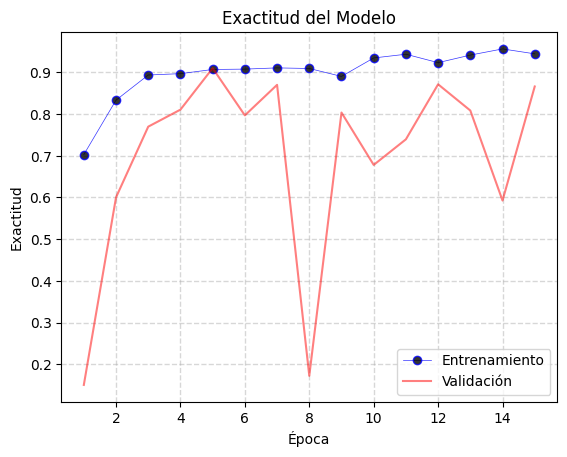

In [39]:
#Gráfico de la Exactitud (Accuracy) durante el Entrenamiento y Validación:
plt.plot(historia_descongelado['accuracy'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_descongelado['val_accuracy'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Exactitud del Modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

#save plot tight layout
plt.savefig('accuracy_descongelado.png', bbox_inches='tight')
plt.show()

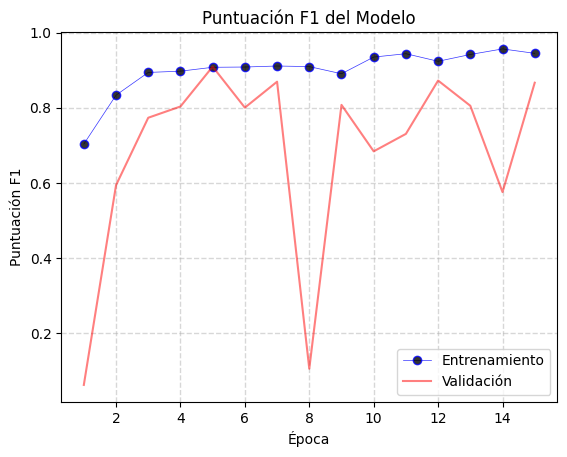

In [40]:
#Gráfico de la Puntuación F1 (F1 Score) durante el Entrenamiento y Validación
plt.plot(historia_descongelado['f1_score'], marker='o', color='blue', mec='blue', mfc='black', lw=0.5, alpha=0.8)
plt.plot(historia_descongelado['val_f1_score'], color='red', mec='red', mfc='red', alpha=0.5, lw=1.5)
plt.title('Puntuación F1 del Modelo')
plt.ylabel('Puntuación F1')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
#grid dotted
plt.grid(linestyle='--', linewidth=1, alpha=0.5)

#save plot tight layout
plt.savefig('f1_score_descongelado.png', bbox_inches='tight')

plt.show()

In [20]:
#procesar las imagenes de validacion para usar el modelo
datagen_valid = ImageDataGenerator(rescale=1./255)

#creamos un generador de datos para el conjunto de validacion
valid_generator = datagen_valid.flow_from_dataframe(
    dataframe=df_val,
    directory=None,
    x_col='path',
    y_col='label',
    target_size=(256, 256),
    batch_size=32,
    class_mod='categorical',
    shuffle=False
)

Found 4585 validated image filenames belonging to 10 classes.


144/144 [==============================] - 175s 1s/step


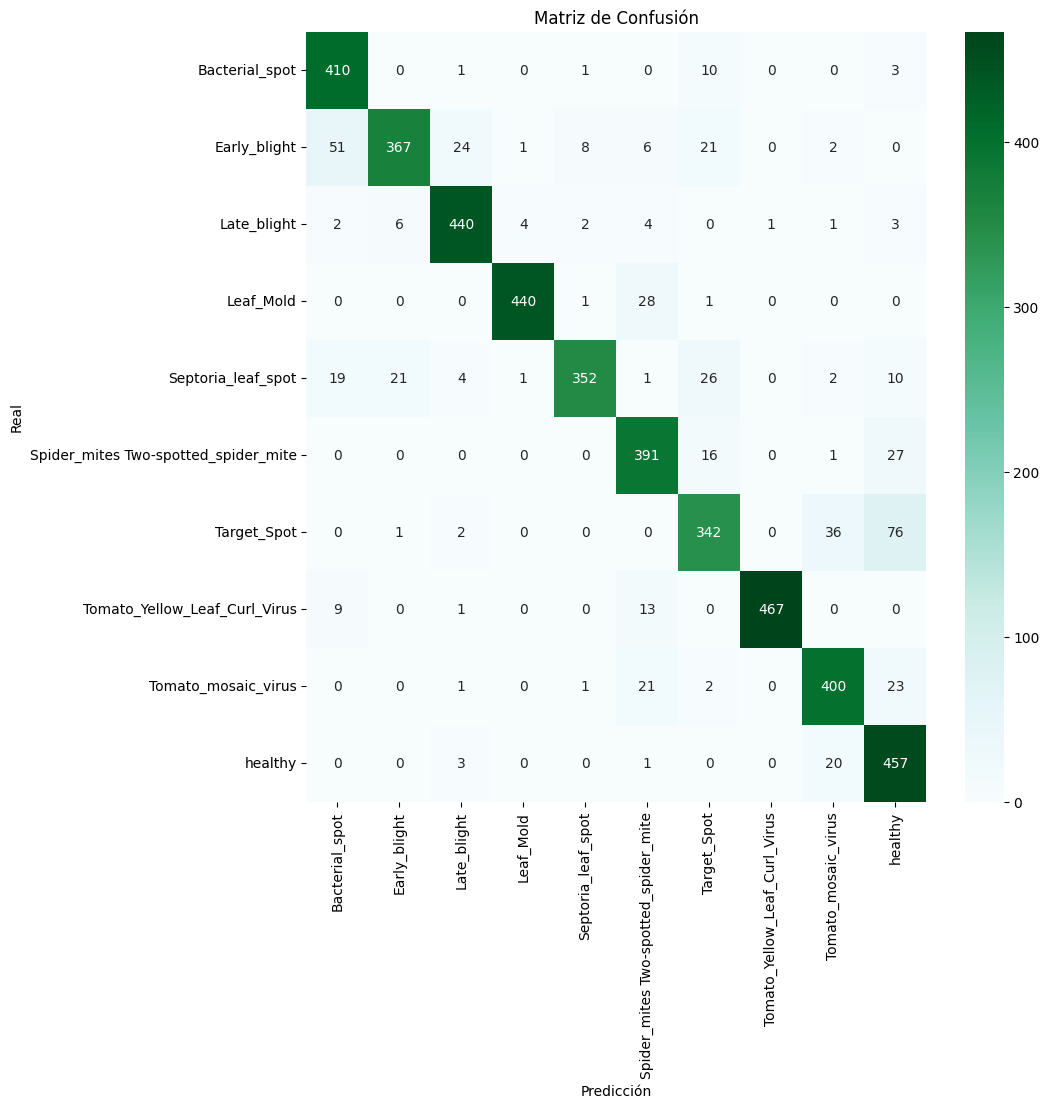

In [22]:
#obtener la matriz de confusión y el accuracy del modelo
Y_pred = modelo_descongelado.predict(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)
#plot confusion matrix
cm = confusion_matrix(valid_generator.classes, y_pred)
#plot la matriz de confusion
plt.figure(figsize=(10,10))
#colorear con gist_ncar

sns.heatmap(cm, annot=True, fmt='d', cmap='BuGn', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())

plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
#save plot tight layout
plt.savefig('confusion_matrix_descongelado.png', bbox_inches='tight')
plt.show()

In [17]:
#obtener la matriz de confusión y el accuracy del modelo
results = modelo_descongelado.evaluate(valid_generator)
print(f'Loss: {results[0]}, Accuracy: {results[1]}, F1-Score: {results[2]}, Recall: {results[3]}')

144/144 [==============================] - 177s 1s/step - loss: 0.4290 - accuracy: 0.8868 - f1_score: 0.8867 - recall: 0.8683
Loss: 0.4289742410182953, Accuracy: 0.8868048191070557, F1-Score: 0.8867168426513672, Recall: 0.8682661056518555


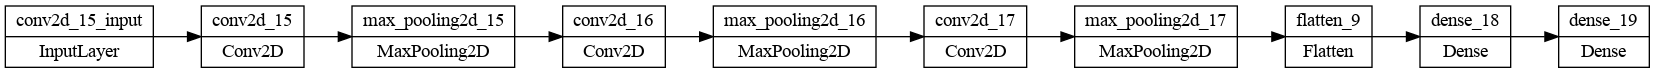

In [23]:
#visuualizar graficamente la arquitecura del modelo
plot_model(modelo_simple, to_file='modelo_simple.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=True, dpi=96)

In [26]:
#visuualizar graficamente la arquitecura del modelo
#plot_model(modelo_descongelado, to_filcme='modelo_descongelado.png', show_shapes=False, show_layer_names=True, expand_nested=True, dpi=96)